<h1> Real Estate in New York City

<h2> Table of Contents

* Introduction
* Business Problem
* Data Collection
* Data Cleaning
* Data Collection from Foursquare API
* Methodolgy & Analysis
* Data Collection from Zillow API
* Results and Discussion
* Conclusion

<h2> Introduction

Toronto is known as an international center of finance, arts, culture, and business as well as being known as one of the most multicultural cities in the world. Toronto is the provincial capital of Ontario and the most populous city in Canada, with a population of 2,731,571 as of 2016.2 In comparison, New York City is the most populous city in the United States with an estimated 2018 population of 8,398,748. In addition, New York City is known as a global power city and renowned as the financial, cultural, and media capital of the world.3

For Alphabet Inc., parent company of Google Inc., both New York City and Toronto are important cities. Google’s Toronto Offices serve as a hub-office for many members of the company’s creative team and salespeople. Engineers and computer scientists at the Google office in Toronto work on many of Google’s well known products and services. In addition, in August 2019 Google announced it would be expanding office space in the financial district of Toronto.4 New York is home to Google’s second largest office in the Chelsea neighborhood of Manhattan. “Engineers work on Google Drive, Search, AdWords, and Maps, and the large sales team works with clients that include media companies and ad agencies.”1

For Real Estate Agents, determining the best area or neighborhood and finding a client’s perfect home at the right place can be the most difficult and time consuming aspect. To complete this task, an agent may spend countless hours on researching and showing clients homes or may pay significant amounts of money to hire employees to conduct research and/or pay for expensive subscriptions to companies that aggregate statistical data.

<h2> Business Problem

As a Real Estate Agent in New York City, a client has contacted me who has accepted a job offer at Google’s NYC office and is relocating from Toronto. The client is ready to make an offer on their new condo/co-op as quickly as possible. This project will help to understand the diversity of each neighborhood analyzed by leveraging venue data from Foursquare’s Places API and k-means clustering unsupervised machine learning algorithm. The objective of this project will be to propose the 3 best listings I can find for my client who will be arriving next week and is ready to buy their new home. The client would like to buy a condo/co-op in a neighborhood most similar to the one they live in now, as similar as possible in price/size to the one they have now, and closest to Google’s NYC office building.

The apartment in Toronto they are moving from is a 2 bedroom & 2 bathroom condo listed for C$899,000 in the Downtown Toronto (the Esplanade) neighborhood of Toronto, ON, Canada. The current home address is: 1 A The Esplanade Ave # 2008, Toronto, ON, M5E 0A8. Google’s NYC office building address is: 75 9th Ave, New York, NY 10011.

<h2> Sources

1. Farfan, Barbara. “Google’s Global Headquarters and Offices Around the World.” The Balance Small Business, The Balance Small Business, 5 Aug. 2019, www.thebalancesmb.com/google-headquarters-offices-2892790.

2. Wikipedia contributors. "Toronto." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 26 Jan. 2020. Web. 26 Jan. 2020.

3. Wikipedia contributors. "New York City." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 19 Jan. 2020. Web. 26 Jan. 2020.

4. Robertson, Becky. “Google Is Opening Another Office in Toronto.” BlogTO, 5 Oct. 2019, www.blogto.com/tech/2019/10/google-opening-another-office-toronto/.

<h2> Data Collection

I will be analyzing neighborhood data from Toronto, Ontario and New York, NY. The first step will be to analyze the neighborhood of the client’s current home in the Downtown Toronto (Old Toronto) neighborhood of Toronto. After obtaining the latitude and longitude of Downtown Toronto, I will obtain the latitude and longitude of Google’s NYC Office as a starting point. Subsequently I will obtain the latitudes and longitudes of NYC neighborhoods surrounding Google’s NYC Office. Once all necessary latitudes and longitudes are obtained, I will analyze each neighborhood utilizing the FourSquare’s Places API to create a profile for each neighborhood based on nearby venues.

Utilizing the FourSquare’s Places API, I will create neighborhood profiles based on nearby venues and the frequency their visited and k-means clustering machine learning algorithm to compare and contrast the profiles created of each neighborhood. Exploratory Data Analysis will assist to determine each neighborhood’s profile. The project objective will be to determine which NYC neighborhoods closest to Google’s NYC Office are the most similar to the Downtown Toronto neighborhood of Toronto. After determining which neighborhood in NYC is closest and most similar, I will utilize Zillow’s API to propose three current listings that are most similar to the client’s current home in the most similar neighborhood.

Stakeholders would be Real Estate Agents, Real Estate Buyers, and other individuals or groups interested in a new way to use quantifiable analysis to understand and profile a neighborhood based on venue information obtained via FourSquare Places API. Previously neighborhood profiles have always been aggregated and compared based on statistical or demographic information. However, I believe a new approach based on venues and often they’re visited for creating neighborhood profiles in order to compare other neighborhood profiles can be much more accurate than the previous method.


New York City Dataset. Link: https://cocl.us/new_york_dataset 


Toronto Dataset. Link: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M 


Toronto Longitude and Latitude Coordinates Dataset. Link: http://cocl.us/Geospatial_data


Foursquare API. Link: https://developer.foursquare.com/docs 


Zillow API. Link: https://www.zillow.com/howto/api/APIOverview.htm

<h2> Data Collection and Cleaning: New York City

New York City is composed of 5 Boroughs; The Bronx, Manhattan, Brooklyn, Queens, and Staten Island. The client would like to live as close to the Google office located in the Chelsea neighborhood of Manhattan. We will only want to explore the neighborhoods in Manhattan, focusing on Chelsea and the closest surrounding neighborhoods that might be the best match. In order to explore the neighborhoods we will obtain the latitude and longitude coordinates of each neighborhoods from the *New York City Dataset*. Once the dataset is downloaded we will transform it into a pandas dataframe. 

*Importing the Necessary Libraries*

In [220]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas import DataFrame
import json
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import requests
import numpy as np
import lxml
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt; plt.rcdefaults()
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0
import folium

Solving environment: done

# All requested packages already installed.



*Determing the Latitude & Longitude of the client's current address in Toronto, Ontario, Canada*

In [221]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("The Esplanade Ave, Toronto, ON")

In [222]:
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

The Esplanade, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5E 1A7, Canada
Latitude = 43.6473078, Longitude = -79.3731821


*Determing the Latitude & Longitude of the Google office in the Chelsea neighborhood of New York, NY*

In [223]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Chelsea, New York, New York")

In [224]:
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Chelsea, Manhattan Community Board 4, Manhattan, New York County, New York, United States of America
Latitude = 40.7464906, Longitude = -74.0015283


*Downloading the New York City dataset*

In [7]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


*Exploring and Understanding the New York City dataset*

In [225]:
with open('newyork_data.json') as json_data:
    newyork_dataset = json.load(json_data)

In [226]:
newyork_dataset

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

*The relevant data such as the borough name, neighborhood name, and corresponding latitude and longitude is in the features key. By defining a new variable, features, that includes the data we will be able to explore it using the Foursquare API and Zillow API.*

In [227]:
neighborhoods_data = newyork_dataset['features']

In [228]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

*The data now must be transformed into a pandas dataframe consisting of four columns: 'Borough', 'Neighborhood', 'Latitude', 'Longitude' .*

In [229]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)

In [230]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [231]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

*Creating the dataframe*

In [232]:
neighborhoods.head(20)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [233]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape
    )
)

The dataframe has 5 boroughs and (306, 4) neighborhoods.


*Dataframe has 306 rows and 4 columns.*

In [234]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


*Using the folium library, we will take a look on the map of the possible neighborhoods the client could move to in New York City*

In [235]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

*Since the client will be working from the Google office in the Chelsea neighborhood, we will focus on exploring only the neighborhoods in Manhattan*

In [236]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [237]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


*Using the folium library, we will take a look on the map of the possible neighborhoods the client could move to in Manhattan*

In [238]:
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

*We will want to compare the neighborhoods closest to the Google office in the Chelsea neighborhood first.*

In [239]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Chelsea, New York, New York")

In [240]:
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Chelsea, Manhattan Community Board 4, Manhattan, New York County, New York, United States of America
Latitude = 40.7464906, Longitude = -74.0015283


In [241]:
map_manhattan2 = folium.Map(location=[location.latitude, location.longitude], zoom_start=15)
folium.CircleMarker(location=[location.latitude, location.longitude], radius=200, popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3, weight=0).add_to(map_manhattan2)
map_manhattan2

<h2> Data Collection and Cleaning: Toronto

The client's current home is in the Downtown neighborhood of Toronto, Canada. The client would like to move to a neighborhood in New York City most similiar to their current neighborhood. In order to explore the neighborhoods we will obtain the latitude and longitude coordinates of the Downtown Toronto neighborhood from the Toronto Dataset. Once the dataset is downloaded we will transform it into a pandas dataframe.

*Utilizing Beautiful Soup to scrape the data from the website*

In [242]:
wikipedia_link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
raw_wikipedia_page= requests.get(wikipedia_link).text
soup = BeautifulSoup(raw_wikipedia_page,'xml')
table = soup.find('table',{'class':'wikitable sortable'})

In [243]:
print(table)

<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Harbourfront</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Lawrence_Heights" title="Lawrence Heights">Lawrence Heights</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North

*Identifying the table of data scraped from the website*

In [244]:
results=table.find_all('tr')
nrows=len(results)
nrows

288

*There are 3 Columns and 289 rows of data in the table*

In [245]:
results[0:5]

[<tr>
 <th>Postcode</th>
 <th>Borough</th>
 <th>Neighbourhood
 </th></tr>, <tr>
 <td>M1A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>, <tr>
 <td>M2A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>, <tr>
 <td>M3A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
 </td></tr>, <tr>
 <td>M4A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
 </td></tr>]

In [246]:
header=results[0].text.split()
header

['Postcode', 'Borough', 'Neighbourhood']

*The first row contains the header for each of the 3 Columns; Postcode, Borough, and Neighborhood*

*The data now must be transformed into a pandas dataframe consisting of three columns: PostalCode, Borough, and Neighborhood while only processing the cells that have an assigned borough.*

In [247]:
td1 = table.find_all('td')
counter = 0
table = []
row = []
for detail in td1:
    if counter < 3:
        row.append(detail.get_text().strip())
        counter+=1
    else:
        table.append(row)
        counter = 0
        row = []
        row.append(detail.get_text().strip())
        counter+=1

In [248]:
headers=['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(table, columns=headers)
def cleaning (row):
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']
    return row
df2 = df.apply(cleaning, axis=1)
df2 = df2[df2['Borough'] != 'Not assigned']

*Creating the dataframe*

In [249]:
df3 = df2.groupby(['Postalcode', 'Borough'])['Neighborhood']. apply (lambda x: "%s" % ', '.join(x)).reset_index()
df3.head(5)

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [250]:
df3.index

RangeIndex(start=0, stop=103, step=1)

*Dataframe has 103 rows*

In [251]:
df3.head(12)

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [252]:
df3.shape

(103, 3)

*Dataframe has 103 rows and 3 columns.*

*I will add the longitude and latitude coordinates of each neighborhood to the dataframe of the postal code, neighborhood name, and borough name.*

*Importing the longitude and latitude coordinates from http://cocl.us/Geospatial_data*

In [253]:
!wget -q -O 'Toronto_longlat_data.csv'  http://cocl.us/Geospatial_data
df_longlat = pd.read_csv('Toronto_longlat_data.csv')
df_longlat.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


*The first row contains the header for each of the 3 Columns; Postal Code, Latitude, and Longitude*

In [254]:
df_longlat.columns=['Postalcode','Latitude','Longitude']

In [255]:
df_longlat.head()

,Postalcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


*The longitude and latitude coordinates will be merged with the previous dataframe and now will consist of five columns: PostalCode, Borough, Neighborhood, Latitude, and Longitude.*

In [256]:
TorontoLongLat_df = pd.merge(df3,
                 df_longlat[['Postalcode','Latitude', 'Longitude']],
                 on='Postalcode')
TorontoLongLat_df

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [257]:
TorontoLongLat_df.head(12)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [258]:
TorontoLongLat_df.shape

(103, 5)

*Dataframe has 103 rows and 5 columns.*

*We will explore and cluster the neighborhoods in Toronto. Working with only boroughs that contain the word Toronto, we will identify the client's neighborhood and any other similarities there might be.*

*I will create dataframe toronto_df that only lists boroughs that contain the word Toronto (excluding all other boroughs that do not contain the word Toronto).*

In [259]:
toronto_df= TorontoLongLat_df[TorontoLongLat_df['Borough'].str.contains('Toronto', na = False)].reset_index(drop=True)
toronto_df.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [260]:
toronto_df.shape

(39, 5)

*Dataframe toronto_df is correct. There are 5 columns and 39 boroughs that only contain the word Toronto.*

*Using the geopy library I will obtain the latitude and longitude values of Toronto, Canada. To define an instance of the geocoder, I will name my user_agent "to_explorer".*

In [261]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.653963, -79.387207.


*Using the folium visualization library I will create a map that segments and clusters only the neighborhoods within the boroughs of Toronto that only contain the word "Toronto".*

In [262]:
TorontoMap = folium.Map(location=[latitude, longitude], zoom_start=11)


for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(TorontoMap)  
    
TorontoMap

*We will want to compare the neighborhoods in Manhattan to find which are most similar to the client's current neighborhood in Toronto.*

In [263]:
locator = Nominatim(user_agent="myGeocoder")
location2 = locator.geocode("The Esplanade Ave, Toronto, ON")
print(location2.address)
print("Latitude = {}, Longitude = {}".format(location2.latitude, location2.longitude))

The Esplanade, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5E 1A7, Canada
Latitude = 43.6473078, Longitude = -79.3731821


In [264]:
map_toronto3 = folium.Map(location=[location2.latitude, location2.longitude], zoom_start=15)
folium.CircleMarker(location=[location2.latitude, location2.longitude], radius=200, popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3, weight=0).add_to(map_toronto3)
map_toronto3

<h2> Data Collection from APIs

We will gather data from the Foursquare API and Zillow API. 

Using the Foursquare API, we will gather the 15 most common venues in and around the client's current neighborhood in Downtown Toronto.   
We will also gather the 15 most common venues in the Chelsea neighborhood and other surrounding neighborhoods in Manhattan.
Using the data gathered by utilizing the Foursquare API, we will identify the best neighborhood for the client that is most similiar to their current neighborhood.

In the analysis section, using the Zillow API, we will gather three condo/co-ops for sale most similiar to the client's current home and in the optimal neighborhood, to propose to the client. 

**Foursquare API**

**Manhattan neighborhoods**

In [265]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


*In order to utilize the Foursquare API to explore the Manhattan neighborhoods I will define my Foursquare credentials and verison.*

In [266]:
CLIENT_ID = 'D2SZQBMUQNGKBBDUGW4VNNQAFIMOPWNI2ELVT3CODIY2LWH0' # Foursquare ID
CLIENT_SECRET = 'HOMTQWIOF5TSSYS3WGJRUQ1GFTPU5STWCNQK0EW4KI4TH5AA' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D2SZQBMUQNGKBBDUGW4VNNQAFIMOPWNI2ELVT3CODIY2LWH0
CLIENT_SECRET:HOMTQWIOF5TSSYS3WGJRUQ1GFTPU5STWCNQK0EW4KI4TH5AA


In [267]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [268]:
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [269]:
category_list = category_results['response']['categories']

In [270]:
len(category_list)

10

In [271]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


*I will create a function that names the API request url, makes the GET request, and returns only relevant information for each nearby venue.*

In [272]:
LIMIT = 100 
radius = 1500

In [273]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)    

*I will now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.*

In [274]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


*I will check the size of the resulting dataframe.*

In [275]:
print(manhattan_venues.shape)
manhattan_venues.head()

(4000, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


*I will check how many venues were returned for each neighborhood.*

In [276]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,100,100,100,100,100,100
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,100,100,100,100,100,100
East Village,100,100,100,100,100,100


In [277]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 277 uniques categories.


**Analyzing Each Manhattan Neighborhood**

In [278]:
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Cooking School,Cosmetics Shop,Coworking Space,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Reservoir,Resort,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Stu

*I will examine the new dataframe size.*

In [279]:
manhattan_onehot.shape

(4000, 278)

*By taking the mean of the frequency of occurrence of each category I will group the rows by neighborhood.*

In [280]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Cooking School,Cosmetics Shop,Coworking Space,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Reservoir,Resort,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Stu

In [281]:
manhattan_grouped.shape

(40, 278)

*Now I will write a function to sort the venues in descending order.*

In [282]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

*I will print each neighborhood along with the top 15 most common venues.*

In [283]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Gym / Fitness Center,Wine Shop,Hotel,Memorial Site,Falafel Restaurant,Gym,Plaza,Monument / Landmark,Cocktail Bar,Pizza Place,Bookstore,Scenic Lookout,Dog Run
1,Carnegie Hill,Coffee Shop,Yoga Studio,Exhibit,Gym / Fitness Center,Art Museum,Wine Shop,Café,Pizza Place,Bakery,French Restaurant,Italian Restaurant,Bookstore,Bar,Salon / Barbershop,American Restaurant
2,Central Harlem,Southern / Soul Food Restaurant,Yoga Studio,Coffee Shop,Cocktail Bar,Mexican Restaurant,American Restaurant,Café,Juice Bar,Pizza Place,Bar,French Restaurant,Park,Wine Shop,Indian Restaurant,Caribbean Restaurant
3,Chelsea,Art Gallery,Yoga Studio,Gym / Fitness Center,Park,Seafood Restaurant,Bakery,Coffee Shop,Sushi Restaurant,Japanese Restaurant,New American Restaurant,Cycle Studio,Tapas Restaurant,Gym,Hotel,Scenic Lookout
4,Chinatown,Hotel,Cocktail Bar,Pizza Place,Bakery,Coffee Shop,Ice Cream Shop,Spa,Chinese Restaurant,Mediterranean Restaurant,Sandwich Place,Jewelry Store,Gift Shop,Rock Club,Thai Restaurant,Yoga Studio


**Clustering Manhattan Neighborhoods**

*Runing k-means to cluster the neighborhoods into 4 clusters:*

In [284]:
kclusters = 4

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)


kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)


kmeans.labels_[0:15] 

array([3, 1, 0, 3, 1, 3, 2, 0, 1, 3, 3, 3, 1, 0, 2], dtype=int32)

*Creating a new dataframe that includes the cluster as well as the top 15 most common venues for each neighborhood:*

In [285]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data


manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,0,Mexican Restaurant,Pizza Place,Park,Café,Bakery,Coffee Shop,Bar,Diner,Latin American Restaurant,Donut Shop,Deli / Bodega,Wine Shop,Thai Restaurant,Restaurant,Scenic Lookout
1,Manhattan,Chinatown,40.715618,-73.994279,1,Hotel,Cocktail Bar,Pizza Place,Bakery,Coffee Shop,Ice Cream Shop,Spa,Chinese Restaurant,Mediterranean Restaurant,Sandwich Place,Jewelry Store,Gift Shop,Rock Club,Thai Restaurant,Yoga Studio
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Park,Pizza Place,Bakery,Latin American Restaurant,Café,Mexican Restaurant,Coffee Shop,Wine Shop,Tapas Restaurant,Spanish Restaurant,Bar,Scenic Lookout,Sandwich Place,Grocery Store,Mobile Phone Shop
3,Manhattan,Inwood,40.867684,-73.921210,0,Wine Bar,Latin American Restaurant,Mexican Restaurant,Pizza Place,Park,Deli / Bodega,Café,Spanish Restaurant,Lounge,Bar,Bakery,Playground,Restaurant,Wine Shop,Frozen Yogurt Shop
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Coffee Shop,Bar,Yoga Studio,Park,Italian Restaurant,Mexican Restaurant,Cocktail Bar,Deli / Bodega,Seafood Restaurant,Café,French Restaurant,Pizza Place,Scenic Lookout,Ethiopian Restaurant,Pool


*Visualizing the resulting clusters:*

In [286]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examining Manhattan Clusters**

**Cluster 1**

In [287]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Marble Hill,Mexican Restaurant,Pizza Place,Park,Café,Bakery,Coffee Shop,Bar,Diner,Latin American Restaurant,Donut Shop,Deli / Bodega,Wine Shop,Thai Restaurant,Restaurant,Scenic Lookout
2,Washington Heights,Park,Pizza Place,Bakery,Latin American Restaurant,Café,Mexican Restaurant,Coffee Shop,Wine Shop,Tapas Restaurant,Spanish Restaurant,Bar,Scenic Lookout,Sandwich Place,Grocery Store,Mobile Phone Shop
3,Inwood,Wine Bar,Latin American Restaurant,Mexican Restaurant,Pizza Place,Park,Deli / Bodega,Café,Spanish Restaurant,Lounge,Bar,Bakery,Playground,Restaurant,Wine Shop,Frozen Yogurt Shop
4,Hamilton Heights,Coffee Shop,Bar,Yoga Studio,Park,Italian Restaurant,Mexican Restaurant,Cocktail Bar,Deli / Bodega,Seafood Restaurant,Café,French Restaurant,Pizza Place,Scenic Lookout,Ethiopian Restaurant,Pool
5,Manhattanville,Park,Italian Restaurant,Coffee Shop,American Restaurant,Cocktail Bar,Mexican Restaurant,Yoga Studio,Pizza Place,Historic Site,Seafood Restaurant,Caribbean Restaurant,Café,French Restaurant,Tennis Court,Bar
6,Central Harlem,Southern / Soul Food Restaurant,Yoga Studio,Coffee Shop,Cocktail Bar,Mexican Restaurant,American Restaurant,Café,Juice Bar,Pizza Place,Bar,French Restaurant,Park,Wine Shop,Indian Restaurant,Caribbean Restaurant
7,East Harlem,Café,Park,Mexican Restaurant,Pizza Place,Cocktail Bar,Fountain,Thai Restaurant,Gym,Coffee Shop,Plaza,Latin American Restaurant,Wine Bar,Wine Shop,Gym / Fitness Center,Bakery
25,Manhattan Valley,Park,Coffee Shop,Grocery Store,Chinese Restaurant,Indian Restaurant,Ice Cream Shop,Pizza Place,Playground,Latin American Restaurant,Farmers Market,Fountain,Spa,Mexican Restaurant,Bakery,Italian Restaurant
26,Morningside Heights,Park,Coffee Shop,Italian Restaurant,American Restaurant,Chinese Restaurant,Playground,Bakery,Seafood Restaurant,Bookstore,Grocery Store,Mexican Restaurant,Gastropub,Pizza Place,Cocktail Bar,Dog Run


**Cluster 2**

In [288]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,Chinatown,Hotel,Cocktail Bar,Pizza Place,Bakery,Coffee Shop,Ice Cream Shop,Spa,Chinese Restaurant,Mediterranean Restaurant,Sandwich Place,Jewelry Store,Gift Shop,Rock Club,Thai Restaurant,Yoga Studio
8,Upper East Side,Exhibit,Italian Restaurant,Bakery,Art Museum,Yoga Studio,Gym / Fitness Center,Ice Cream Shop,Bar,Thai Restaurant,Spanish Restaurant,Playground,Outdoor Sculpture,Bookstore,Hotel,Burger Joint
9,Yorkville,Italian Restaurant,Coffee Shop,Yoga Studio,Bakery,Gym,Pizza Place,Ice Cream Shop,Mexican Restaurant,Japanese Restaurant,Bagel Shop,Seafood Restaurant,Salon / Barbershop,Wine Bar,Sushi Restaurant,Deli / Bodega
12,Upper West Side,Park,Bakery,Italian Restaurant,Wine Bar,Ice Cream Shop,Gym,Planetarium,Coffee Shop,Yoga Studio,Mediterranean Restaurant,Seafood Restaurant,Chinese Restaurant,Exhibit,Bookstore,Peruvian Restaurant
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Yoga Studio,Pizza Place,Coffee Shop,Salad Place,Gym,Spa,Seafood Restaurant,Gym / Fitness Center,Cocktail Bar,Salon / Barbershop,Comedy Club,Sandwich Place,Cheese Shop
19,East Village,Juice Bar,Wine Shop,Wine Bar,Cocktail Bar,Japanese Restaurant,Pizza Place,Gym,Asian Restaurant,Greek Restaurant,Tea Room,Sake Bar,Italian Restaurant,Theater,Coffee Shop,Gourmet Shop
20,Lower East Side,Cocktail Bar,Japanese Restaurant,Wine Bar,Pizza Place,Greek Restaurant,Coffee Shop,Italian Restaurant,Asian Restaurant,Speakeasy,Beer Bar,Southern / Soul Food Restaurant,Wine Shop,Bakery,Rock Club,Juice Bar
22,Little Italy,Pizza Place,Yoga Studio,Hotel,Thai Restaurant,Café,Cocktail Bar,Italian Restaurant,Coffee Shop,Pilates Studio,Bakery,Rock Club,Salon / Barbershop,Mediterranean Restaurant,New American Restaurant,Bookstore
23,Soho,Italian Restaurant,Spa,Yoga Studio,Sushi Restaurant,Café,Thai Restaurant,Salon / Barbershop,Pizza Place,Coffee Shop,Bookstore,Mediterranean Restaurant,Salad Place,Gym,Clothing Store,Pilates Studio
24,West Village,Italian Restaurant,New American Restaurant,Seafood Restaurant,American Restaurant,Yoga Studio,Cocktail Bar,Coffee Shop,Bakery,Park,Jazz Club,Garden,Pizza Place,Gourmet Shop,Salad Place,Salon / Barbershop


**Cluster 3**

In [289]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
14,Clinton,Theater,Pizza Place,Hotel,Dance Studio,Bakery,Mediterranean Restaurant,Sandwich Place,Thai Restaurant,Bar,Performing Arts Venue,Italian Restaurant,Ice Cream Shop,Wine Bar,Indie Theater,Gym
15,Midtown,Theater,Hotel,Gym,Steakhouse,Plaza,Chinese Restaurant,Japanese Restaurant,Burger Joint,Coffee Shop,Cosmetics Shop,Concert Hall,Sushi Restaurant,Sandwich Place,American Restaurant,Scenic Lookout
39,Hudson Yards,Theater,Art Gallery,Dance Studio,Park,Bakery,Indie Theater,Pizza Place,Lounge,Mediterranean Restaurant,Bar,Coffee Shop,Gym / Fitness Center,Ice Cream Shop,Hotel Bar,American Restaurant


**Cluster 4**

In [290]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
10,Lenox Hill,Italian Restaurant,Gym / Fitness Center,Art Museum,Bakery,Gym,Sushi Restaurant,Cycle Studio,Hotel,Women's Store,Ice Cream Shop,French Restaurant,Park,Grocery Store,Dessert Shop,Playground
11,Roosevelt Island,Park,Gym,Sushi Restaurant,Pizza Place,Ice Cream Shop,Gym / Fitness Center,Deli / Bodega,Greek Restaurant,Cocktail Bar,Italian Restaurant,Playground,Café,Liquor Store,Beer Garden,Thai Restaurant
13,Lincoln Square,Theater,Bakery,Performing Arts Venue,Italian Restaurant,Gym / Fitness Center,Jazz Club,Concert Hall,Mediterranean Restaurant,French Restaurant,Sushi Restaurant,Spa,Indie Movie Theater,Gym,Park,Plaza
16,Murray Hill,Korean Restaurant,Japanese Restaurant,Coffee Shop,Hotel,Gym / Fitness Center,Pizza Place,Chinese Restaurant,Sandwich Place,Mediterranean Restaurant,Cycle Studio,American Restaurant,New American Restaurant,Cosmetics Shop,Salad Place,Cuban Restaurant
17,Chelsea,Art Gallery,Yoga Studio,Gym / Fitness Center,Park,Seafood Restaurant,Bakery,Coffee Shop,Sushi Restaurant,Japanese Restaurant,New American Restaurant,Cycle Studio,Tapas Restaurant,Gym,Hotel,Scenic Lookout
21,Tribeca,Italian Restaurant,Park,Sushi Restaurant,Women's Store,Cycle Studio,Gym,Café,Salon / Barbershop,French Restaurant,Coffee Shop,Bakery,Spa,Men's Store,Pizza Place,Dance Studio
27,Gramercy,Gym / Fitness Center,Gourmet Shop,New American Restaurant,Pizza Place,Cycle Studio,Mediterranean Restaurant,Juice Bar,Gym,Japanese Restaurant,American Restaurant,Wine Shop,Cheese Shop,Spa,Coffee Shop,Bookstore
28,Battery Park City,Park,Coffee Shop,Gym / Fitness Center,Wine Shop,Hotel,Memorial Site,Falafel Restaurant,Gym,Plaza,Monument / Landmark,Cocktail Bar,Pizza Place,Bookstore,Scenic Lookout,Dog Run
29,Financial District,Coffee Shop,Park,Gym / Fitness Center,Pizza Place,Memorial Site,American Restaurant,Cocktail Bar,Plaza,Gym,Café,Shopping Mall,Scenic Lookout,Salad Place,French Restaurant,Falafel Restaurant
32,Civic Center,Park,Hotel,Women's Store,Spa,Wine Bar,Memorial Site,Bakery,Plaza,Salon / Barbershop,Cocktail Bar,Coffee Shop,Cycle Studio,Dance Studio,Men's Store,Falafel Restaurant


**To visualize the data gathered about the Manhattan neighborhoods, we will create two bar plots for the 1st and 2nd most common venues:**

*We will compare the potential neighborhoods in Manhattan to find the neighborhood most similar to the client's current neighborhood.*

In [291]:
manhattan_venues = manhattan_merged
manhattan_venues = manhattan_venues.drop(['Borough', 'Latitude', 'Longitude'], axis=1)
manhattan_venues = manhattan_venues.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')
manhattan_cluster_1 = manhattan_venues.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
manhattan_cluster_1 = manhattan_cluster_1.fillna(0).astype(int).reset_index(drop=True)
manhattan_cluster_1

1st Most Common Venue,Art Gallery,Café,Cocktail Bar,Coffee Shop,Exhibit,Gym,Gym / Fitness Center,Hotel,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Mexican Restaurant,Park,Pizza Place,Southern / Soul Food Restaurant,Theater,Wine Bar
0,0,1,0,1,0,0,0,0,0,0,0,0,1,4,0,1,0,1
1,0,0,1,1,1,0,0,1,4,1,1,0,0,1,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
3,1,0,0,1,0,1,4,1,2,0,0,1,0,3,0,0,1,0


*Manhattan Bar Chart 1st most common venues:*

Text(0, 0.5, 'Venues')

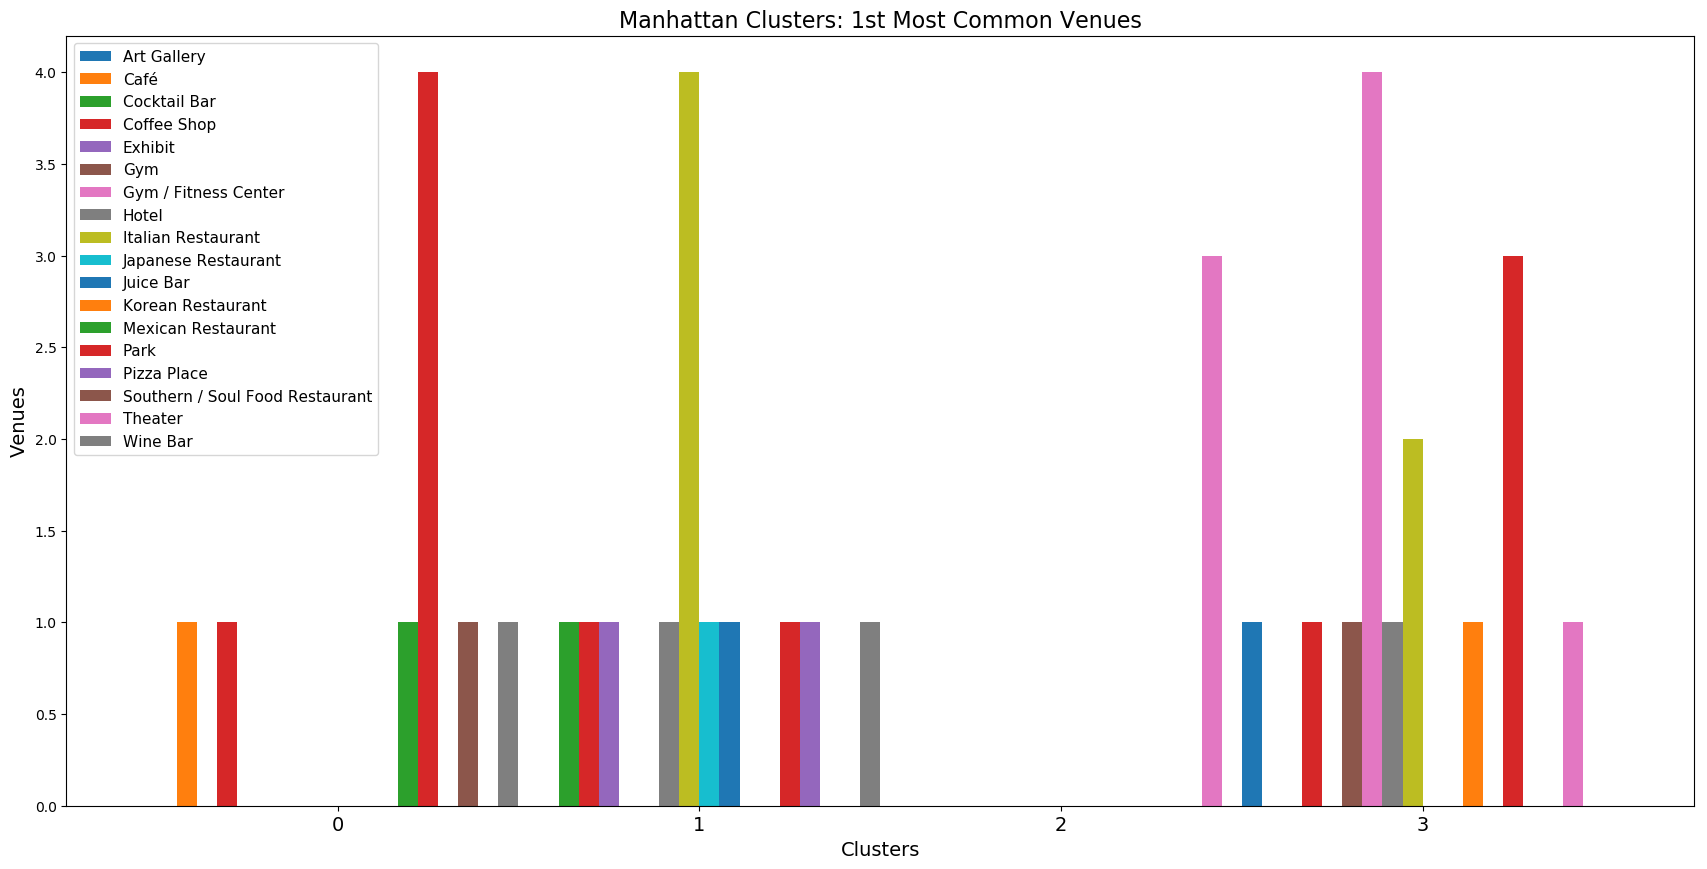

In [292]:
frame=manhattan_cluster_1.plot(kind='bar',figsize=(21,10),width = 1.0)

plt.legend(labels=manhattan_cluster_1.columns,fontsize= 11)
plt.title("Manhattan Clusters: 1st Most Common Venues",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Venues', fontsize=14)

In [294]:
manhattan_venues2 = manhattan_merged
manhattan_venues2 = manhattan_venues2.drop(['Borough', 'Latitude', 'Longitude'], axis=1)
manhattan_venues2 = manhattan_venues2.groupby(['Cluster Labels','2nd Most Common Venue']).size().reset_index(name='Counts')
manhattan_cluster_2 = manhattan_venues2.pivot(index='Cluster Labels', columns='2nd Most Common Venue', values='Counts')
manhattan_cluster_2 = manhattan_cluster_2.fillna(0).astype(int).reset_index(drop=True)
manhattan_cluster_2

2nd Most Common Venue,Art Gallery,Bakery,Bar,Cocktail Bar,Coffee Shop,Gourmet Shop,Gym,Gym / Fitness Center,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,New American Restaurant,Park,Pizza Place,Plaza,Sandwich Place,Spa,Sushi Restaurant,Wine Shop,Yoga Studio
0,0,0,1,0,2,0,0,0,0,1,0,0,1,0,1,2,0,0,0,0,0,1
1,0,1,0,1,2,0,0,0,0,2,1,0,0,1,0,0,0,0,1,1,1,2
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,1,1,1,1,0,1,1,0,0,2,0,1,1,1,0,0,2


*Manhattan Bar Chart 2nd most common venues:*

Text(0, 0.5, 'Venues')

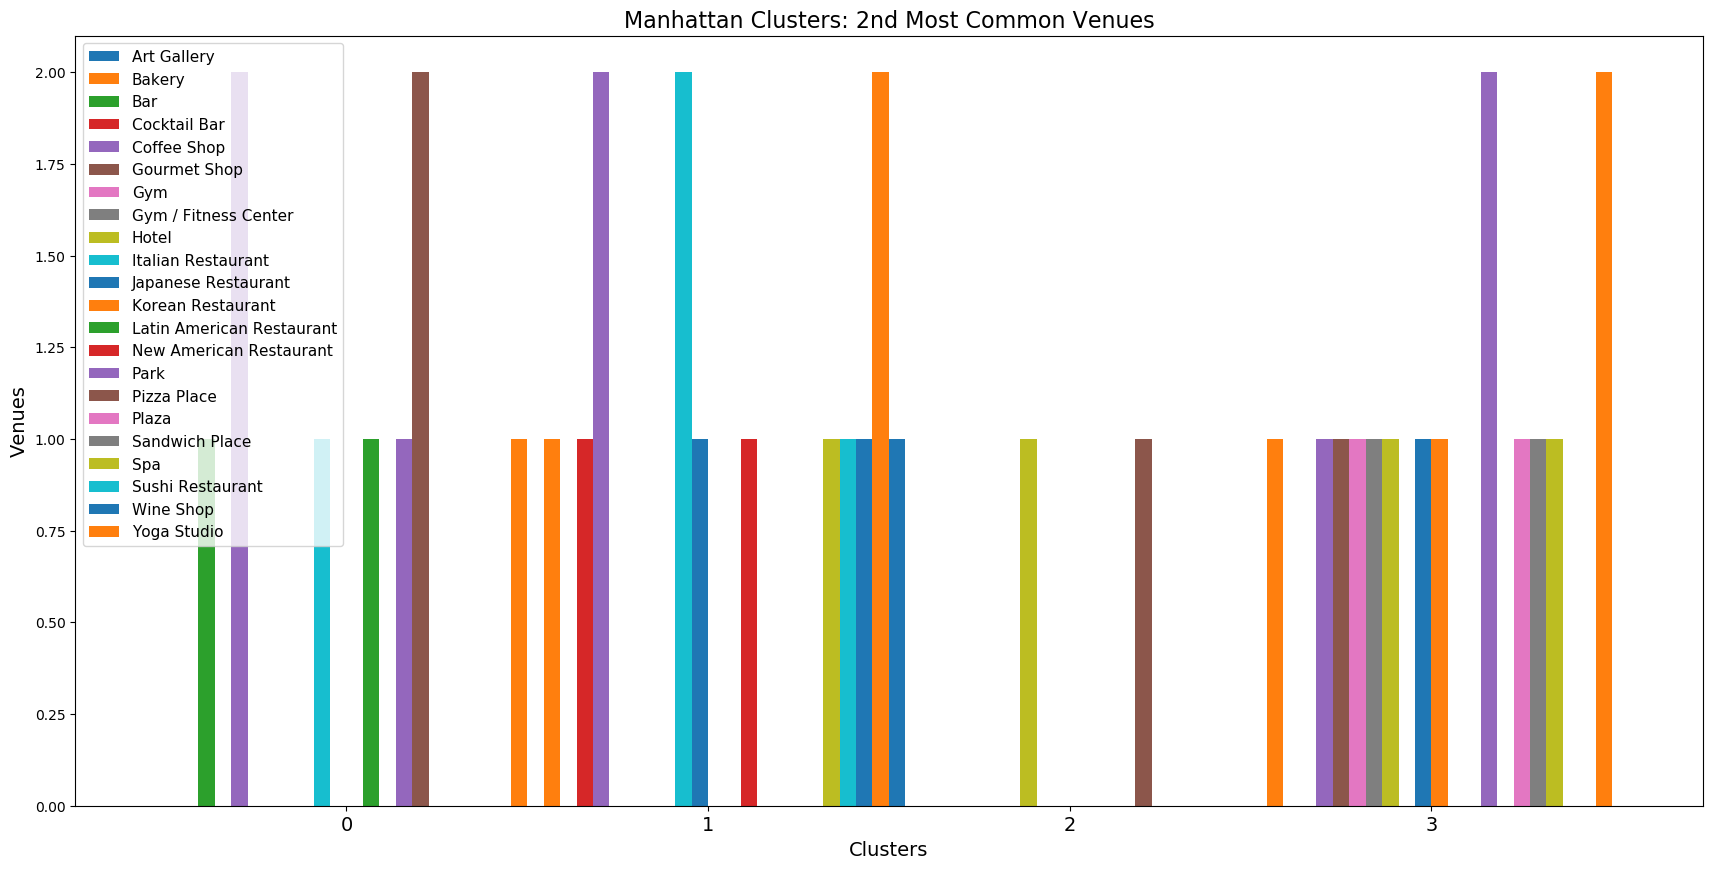

In [295]:
frame=manhattan_cluster_2.plot(kind='bar',figsize=(21,10),width = 1.0)

plt.legend(labels=manhattan_cluster_2.columns,fontsize= 11)
plt.title("Manhattan Clusters: 2nd Most Common Venues",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Venues', fontsize=14)

*From the information gathered about the Manhattan neighborhoods we will list the 1st most common venues:*

**Cluster, Manhattan:** 

**0: "Coffee Shop, Kor. Rest., South. Rest., Mex. Rest., Pizza Place"** 

**1: "Ital. Rest., Wine Bar, Jap. Rest., Juice Bar, Coffee Shop, Park"**

**2: "Theater, Juice Bar, Park, South. Rest., Ital. Rest., Wine Bar"** 

**3: "Kor. Rest., Park, Gym"**

*We will use the list to find which potential neighborhood in Manhattan is most similar to the client's current neighborhood in Toronto.*

In [296]:
Manhattan_List_1 = {'Cluster, Manhattan': [0,1,2,3], '1st Most Common Venues': ["Coffee Shop, Kor. Rest., South. Rest., Mex. Rest., Pizza Place","Ital. Rest., Wine Bar, Jap. Rest., Juice Bar, Coffee Shop, Park","Theater, Juice Bar, Park, South. Rest., Ital. Rest., Wine Bar", "Kor. Rest., Park, Gym"]}
Manhattan_List_1 = pd.DataFrame(data=Manhattan_List_1)
Manhattan_List_1


,"Cluster, Manhattan",1st Most Common Venues
0,0,"Coffee Shop, Kor. Rest., South. Rest., Mex. Re..."
1,1,"Ital. Rest., Wine Bar, Jap. Rest., Juice Bar, ..."
2,2,"Theater, Juice Bar, Park, South. Rest., Ital. ..."
3,3,"Kor. Rest., Park, Gym"


*From the information gathered about the Manhattan neighborhoods we will list the 2nd most common venues:*

**Cluster, Manhattan:** 

**0: "Bar, Coffee Shop, Sushi Rest., Park, Latin Rest., Gourmet Shop"** 

**1: "Yoga Studio, New Amer. Rest., Park, Ital. Rest., Wine Shop"**

**2: "Spa, Yoga Studio, Pizza Place, Park, Plaza, Sandwich Place, Wine Shop"** 

**3: "Yoga Studio, Park, Plaza, Sandwich Place, Spa"**

*We will use the list to find which potential neighborhood in Manhattan is most similar to the client's current neighborhood in Toronto.*

In [297]:
Manhattan_List_2 = {'Cluster, Manhattan': [0,1,2,3], '2nd Most Common Venues': ["Bar, Coffee Shop, Sushi Rest., Park, Latin Rest., Gourmet Shop","Yoga Studio, New Amer. Rest., Park, Ital. Rest., Wine Shop","Spa, Yoga Studio, Pizza Place, Park, Plaza, Sandwich Place, Wine Shop", "Yoga Studio, Park, Plaza, Sandwich Place, Spa"]}
Manhattan_List_2 = pd.DataFrame(data=Manhattan_List_2)
Manhattan_List_2


,"Cluster, Manhattan",2nd Most Common Venues
0,0,"Bar, Coffee Shop, Sushi Rest., Park, Latin Res..."
1,1,"Yoga Studio, New Amer. Rest., Park, Ital. Rest..."
2,2,"Spa, Yoga Studio, Pizza Place, Park, Plaza, Sa..."
3,3,"Yoga Studio, Park, Plaza, Sandwich Place, Spa"


**Toronto neighborhoods**

In [298]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON are 43.653963, -79.387207.


*In order to utilize the Foursquare API to explore the Toronto neighborhoods I will define my Foursquare credentials and verison.*

In [299]:
CLIENT_ID = 'D2SZQBMUQNGKBBDUGW4VNNQAFIMOPWNI2ELVT3CODIY2LWH0' # your Foursquare ID
CLIENT_SECRET = 'HOMTQWIOF5TSSYS3WGJRUQ1GFTPU5STWCNQK0EW4KI4TH5AA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D2SZQBMUQNGKBBDUGW4VNNQAFIMOPWNI2ELVT3CODIY2LWH0
CLIENT_SECRET:HOMTQWIOF5TSSYS3WGJRUQ1GFTPU5STWCNQK0EW4KI4TH5AA


*I will create a function that names the API request url, makes the GET request, and returns only relevant information for each nearby venue.*

In [300]:
LIMIT = 100 
radius = 1500

In [301]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)  

*I will now write the code to run the above function on each neighborhood and create a new dataframe called tornoto_venues.*

In [302]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

*I will check the size of the resulting dataframe.*

In [303]:
print(toronto_venues.shape)
toronto_venues.head()

(3753, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Fox Theatre,43.672801,-79.287272,Indie Movie Theater
2,The Beaches,43.676357,-79.293031,Ed's Real Scoop,43.672630,-79.287993,Ice Cream Shop
3,The Beaches,43.676357,-79.293031,The Beech Tree,43.680493,-79.288846,Gastropub
4,The Beaches,43.676357,-79.293031,Beaches Bake Shop,43.680363,-79.289692,Bakery


*I will check how many venues were returned for each neighborhood.*

In [304]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,100,100,100,100,100,100
"Brockton, Exhibition Place, Parkdale Village",100,100,100,100,100,100
Business Reply Mail Processing Centre 969 Eastern,100,100,100,100,100,100
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",70,70,70,70,70,70
"Cabbagetown, St. James Town",100,100,100,100,100,100
Central Bay Street,100,100,100,100,100,100
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,100,100,100,100,100,100


In [305]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 270 uniques categories.


**Analyzing Each Toronto Neighborhood**

In [306]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")


toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 


cols=list(toronto_onehot.columns.values)
cols.pop(cols.index('Neighborhood'))
toronto_onehot=toronto_onehot[['Neighborhood']+cols]


toronto_onehot.rename(columns = {'Neighbourhood': 'Neighborhood'}, inplace = True)
toronto_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nudist Beach,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

*I will examine the new dataframe size.*

In [307]:
toronto_onehot.shape

(3753, 270)

*By taking the mean of the frequency of occurrence of each category I will group the rows by neighborhood.*

In [308]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nudist Beach,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Adelaide, King, Richmond",0.0,0.000000,0.000000,0.02,0.0,0.0,0.00,0.0,0.0,0.010000,0.0,0.02,0.01,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.00,0.000000,0.00,0.00,0.00,0.03,0.0,0.0,0.00,0.000000,0.01,0.00,

*Confirming the new size.*

In [309]:
toronto_grouped.shape

(39, 270)

*I will print each neighborhood along with the top 15 most common venues.*

In [310]:
num_top_venues = 15

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                  venue  freq
0           Coffee Shop  0.07
1                  Café  0.06
2                 Hotel  0.06
3           Pizza Place  0.04
4               Theater  0.04
5   Japanese Restaurant  0.03
6              Beer Bar  0.03
7             Gastropub  0.03
8    Seafood Restaurant  0.02
9            Steakhouse  0.02
10        Movie Theater  0.02
11       Breakfast Spot  0.02
12                  Gym  0.02
13         Concert Hall  0.02
14     Sushi Restaurant  0.02


----Berczy Park----
                      venue  freq
0               Coffee Shop  0.13
1                      Café  0.07
2                      Park  0.05
3                Restaurant  0.05
4       Japanese Restaurant  0.04
5                     Hotel  0.04
6        Italian Restaurant  0.03
7                  Beer Bar  0.03
8                 Gastropub  0.03
9                    Bakery  0.02
10  New American Restaurant  0.02
11                      Gym  0.02
12           Farmers Ma

*Now I will write a function to sort the venues in descending order.*

In [311]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

*I will create a new dataframe that displays the top 15 venues for each neighborhood.*

In [318]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Hotel,Café,Pizza Place,Theater,Gastropub,Beer Bar,Japanese Restaurant,Gym,Plaza,Breakfast Spot,Seafood Restaurant,Italian Restaurant,Steakhouse,Movie Theater
1,Berczy Park,Coffee Shop,Café,Park,Restaurant,Japanese Restaurant,Hotel,Beer Bar,Gastropub,Italian Restaurant,Liquor Store,Bakery,Farmers Market,Gym,New American Restaurant,American Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Café,Restaurant,Coffee Shop,Bar,Furniture / Home Store,Gift Shop,Park,Bakery,Tibetan Restaurant,New American Restaurant,Tea Room,Japanese Restaurant,Theater,Theme Park,Athletics & Sports
3,Business Reply Mail Processing Centre 969 Eastern,Coffee Shop,Brewery,Café,Park,Indian Restaurant,Pizza Place,Italian Restaurant,Diner,Beach,Bakery,Sushi Restaurant,Grocery Store,Pet Store,Bar,American Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Park,Café,Coffee Shop,Gym,Harbor / Marina,Boat or Ferry,Scenic Lookout,Pizza Place,Bar,Hotel,Restaurant,Track,Brewery,Pub,Sushi Restaurant
5,"Cabbagetown, St. James Town",Coffee Shop,Café,Park,Gastropub,Thai Restaurant,Diner,Restaurant,Japanese Restaurant,Pub,Dance Studio,Ramen Restaurant,Ice Cream Shop,Breakfast Spot,Pool,Gay Bar
6,Central Bay Street,Coffee Shop,Café,Ramen Restaurant,Pizza Place,Japanese Restaurant,Restaurant,Gastropub,Sushi Restaurant,Bookstore,Yoga Studio,Breakfast Spot,Park,Steakhouse,Mexican Restaurant,Dance Studio
7,"Chinatown, Grange Park, Kensington Market",Café,Bar,Coffee Shop,Sandwich Place,Mexican Restaurant,Taco Place,Art Gallery,Pizza Place,Tapas Restaurant,Dessert Shop,Arts & Crafts Store,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Burger Joint
8,Christie,Café,Coffee Shop,Grocery Store,Indian Restaurant,Ice Cream Shop,Dessert Shop,Korean Restaurant,Italian Restaurant,Bar,Bakery,Middle Eastern Restaurant,Comedy Club,Cocktail Bar,Ethiopian Restaurant,Restaurant
9,Church and Wellesley,Coffee Shop,Park,Café,Japanese Restaurant,Italian Restaurant,Gym,Men's Store,Gastropub,Gay Bar,Diner,Gourmet Shop,Comic Shop,Thai Restaurant,Pizza Place,Ramen Restaurant


**Clustering Toronto Neighborhoods**

*Runing k-means to cluster the neighborhood into 4 clusters:*

In [319]:
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_[0:15]

array([0, 0, 2, 3, 3, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0], dtype=int32)

*Creating a new dataframe that includes the cluster as well as the top 15 most common venues for each neighborhood:*

In [320]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_df

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



toronto_merged

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,3,Coffee Shop,Pub,Grocery Store,Japanese Restaurant,Bakery,Breakfast Spot,Sandwich Place,Pizza Place,BBQ Joint,Beach,Thai Restaurant,Tea Room,Caribbean Restaurant,Gas Station,Bar
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,2,Café,Greek Restaurant,Coffee Shop,Pizza Place,Park,Bakery,Pub,Italian Restaurant,Ice Cream Shop,Yoga Studio,Burger Joint,Vietnamese Restaurant,Spa,Grocery Store,Business Service
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,3,Coffee Shop,Park,Indian Restaurant,Café,Brewery,Italian Restaurant,Pub,Pizza Place,Beach,Bakery,BBQ Joint,Grocery Store,Diner,Burrito Place,Bar
3,M4M,East Toronto,Studio District,43.659526,-79.340923,3,Coffee Shop,Café,Vietnamese Restaurant,Bar,Bakery,Park,Brewery,Restaurant,Diner,Pizza Place,Pet Store,Ice Cream Shop,Bank,Thai Restaurant,Grocery Store
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Coffee Shop,Sushi Restaurant,Italian Restaurant,Bakery,Gym / Fitness Center,Asian Restaurant,Pub,Restaurant,Sandwich Place,Café,Burger Joint,Park,Lingerie Store,Golf Course,Pizza Place
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,1,Coffee Shop,Italian Restaurant,Park,Café,Bakery,Indian Restaurant,Pizza Place,Gym,Sporting Goods Shop,Supermarket,Sushi Restaurant,Bookstore,Pharmacy,Thai Restaurant,Asian Restaurant
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,1,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Café,Japanese Restaurant,Sushi Restaurant,Bakery,Pizza Place,Food & Drink Shop,Sporting Goods Shop,Breakfast Spot,Bubble Tea Shop,Ice Cream Shop,Burger Joint,Yoga Studio
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,1,Coffee Shop,Bakery,Italian Restaurant,Café,Pizza Place,Park,Gym,Indian Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Bookstore,Dessert Shop,Deli / Bodega,Supermarket
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,1,Park,Italian Restaurant,Coffee Shop,Sushi Restaurant,Grocery Store,Restaurant,Gas Station,Café,Trail,Bakery,Sandwich Place,American Restaurant,Spa,Liquor Store,Fast Food Restaurant
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,1,Italian Restaurant,Café,Park,Coffee Shop,Sushi Restaurant,Vegetarian / Vegan Restaurant,Liquor Store,American Restaurant,Sandwich Place,Burger Joint,BBQ Joint,History Museum,Restaurant,Bank,Bakery


*Visualizing the resulting clusters:*

In [321]:
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=14)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

**Cluster 1**

In [322]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
11,Downtown Toronto,0,Coffee Shop,Café,Park,Gastropub,Thai Restaurant,Diner,Restaurant,Japanese Restaurant,Pub,Dance Studio,Ramen Restaurant,Ice Cream Shop,Breakfast Spot,Pool,Gay Bar
12,Downtown Toronto,0,Coffee Shop,Park,Café,Japanese Restaurant,Italian Restaurant,Gym,Men's Store,Gastropub,Gay Bar,Diner,Gourmet Shop,Comic Shop,Thai Restaurant,Pizza Place,Ramen Restaurant
14,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Café,Gastropub,Gym,Seafood Restaurant,Restaurant,Cosmetics Shop,Ramen Restaurant,Pizza Place,Plaza,Burrito Place,Steakhouse,Hotel,Tea Room
15,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Seafood Restaurant,Gastropub,Italian Restaurant,Steakhouse,Beer Bar,Clothing Store,Breakfast Spot,Bakery,Gym,Pizza Place,Cosmetics Shop
16,Downtown Toronto,0,Coffee Shop,Café,Park,Restaurant,Japanese Restaurant,Hotel,Beer Bar,Gastropub,Italian Restaurant,Liquor Store,Bakery,Farmers Market,Gym,New American Restaurant,American Restaurant
17,Downtown Toronto,0,Coffee Shop,Café,Ramen Restaurant,Pizza Place,Japanese Restaurant,Restaurant,Gastropub,Sushi Restaurant,Bookstore,Yoga Studio,Breakfast Spot,Park,Steakhouse,Mexican Restaurant,Dance Studio
18,Downtown Toronto,0,Coffee Shop,Hotel,Café,Pizza Place,Theater,Gastropub,Beer Bar,Japanese Restaurant,Gym,Plaza,Breakfast Spot,Seafood Restaurant,Italian Restaurant,Steakhouse,Movie Theater
19,Downtown Toronto,0,Coffee Shop,Café,Hotel,Park,Japanese Restaurant,Steakhouse,Italian Restaurant,Gym,Aquarium,Bar,Theater,Salad Place,Baseball Stadium,Deli / Bodega,Restaurant
20,Downtown Toronto,0,Coffee Shop,Hotel,Café,Italian Restaurant,Theater,Steakhouse,Concert Hall,Farmers Market,Salad Place,Lounge,Japanese Restaurant,Plaza,Thai Restaurant,Monument / Landmark,Gastropub
21,Downtown Toronto,0,Coffee Shop,Café,Hotel,Japanese Restaurant,Gastropub,Italian Restaurant,Beer Bar,Steakhouse,Theater,Farmers Market,Seafood Restaurant,Concert Hall,Vegetarian / Vegan Restaurant,Lounge,Plaza


**Cluster 2**

In [323]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
4,Central Toronto,1,Coffee Shop,Sushi Restaurant,Italian Restaurant,Bakery,Gym / Fitness Center,Asian Restaurant,Pub,Restaurant,Sandwich Place,Café,Burger Joint,Park,Lingerie Store,Golf Course,Pizza Place
5,Central Toronto,1,Coffee Shop,Italian Restaurant,Park,Café,Bakery,Indian Restaurant,Pizza Place,Gym,Sporting Goods Shop,Supermarket,Sushi Restaurant,Bookstore,Pharmacy,Thai Restaurant,Asian Restaurant
6,Central Toronto,1,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Café,Japanese Restaurant,Sushi Restaurant,Bakery,Pizza Place,Food & Drink Shop,Sporting Goods Shop,Breakfast Spot,Bubble Tea Shop,Ice Cream Shop,Burger Joint,Yoga Studio
7,Central Toronto,1,Coffee Shop,Bakery,Italian Restaurant,Café,Pizza Place,Park,Gym,Indian Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Bookstore,Dessert Shop,Deli / Bodega,Supermarket
8,Central Toronto,1,Park,Italian Restaurant,Coffee Shop,Sushi Restaurant,Grocery Store,Restaurant,Gas Station,Café,Trail,Bakery,Sandwich Place,American Restaurant,Spa,Liquor Store,Fast Food Restaurant
9,Central Toronto,1,Italian Restaurant,Café,Park,Coffee Shop,Sushi Restaurant,Vegetarian / Vegan Restaurant,Liquor Store,American Restaurant,Sandwich Place,Burger Joint,BBQ Joint,History Museum,Restaurant,Bank,Bakery
10,Downtown Toronto,1,Park,Coffee Shop,Italian Restaurant,Café,Spa,Restaurant,Hotel,Bar,Caribbean Restaurant,French Restaurant,Liquor Store,Sushi Restaurant,Salad Place,Japanese Restaurant,Gym
22,Central Toronto,1,Coffee Shop,Italian Restaurant,Pharmacy,Pizza Place,Sushi Restaurant,Café,Bank,Bagel Shop,Skating Rink,Burger Joint,Gym / Fitness Center,Bakery,Japanese Restaurant,Liquor Store,Trail
23,Central Toronto,1,Coffee Shop,Italian Restaurant,Sushi Restaurant,Café,Bank,Pizza Place,Bagel Shop,Grocery Store,Park,Middle Eastern Restaurant,Liquor Store,Japanese Restaurant,Trail,Burger Joint,Skating Rink
36,West Toronto,1,Park,Coffee Shop,Bakery,Café,Italian Restaurant,Pizza Place,Gastropub,Pub,Sushi Restaurant,Skating Rink,Food,Flower Shop,Bookstore,Spa,Latin American Restaurant


**Cluster 3**

In [324]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,East Toronto,2,Café,Greek Restaurant,Coffee Shop,Pizza Place,Park,Bakery,Pub,Italian Restaurant,Ice Cream Shop,Yoga Studio,Burger Joint,Vietnamese Restaurant,Spa,Grocery Store,Business Service
24,Central Toronto,2,Coffee Shop,Japanese Restaurant,Café,Korean Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Bakery,Grocery Store,Mexican Restaurant,Pizza Place,Middle Eastern Restaurant,Park,Museum,Bookstore
25,Downtown Toronto,2,Café,Bar,Vegetarian / Vegan Restaurant,Coffee Shop,Bakery,Grocery Store,Restaurant,Ice Cream Shop,Mexican Restaurant,Arts & Crafts Store,Bookstore,Beer Bar,Park,Dessert Shop,Thai Restaurant
26,Downtown Toronto,2,Café,Bar,Coffee Shop,Sandwich Place,Mexican Restaurant,Taco Place,Art Gallery,Pizza Place,Tapas Restaurant,Dessert Shop,Arts & Crafts Store,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Burger Joint
30,Downtown Toronto,2,Café,Coffee Shop,Grocery Store,Indian Restaurant,Ice Cream Shop,Dessert Shop,Korean Restaurant,Italian Restaurant,Bar,Bakery,Middle Eastern Restaurant,Comedy Club,Cocktail Bar,Ethiopian Restaurant,Restaurant
31,West Toronto,2,Café,Italian Restaurant,Coffee Shop,Bar,Bakery,Breakfast Spot,Sushi Restaurant,Park,Gastropub,Thai Restaurant,Mexican Restaurant,Portuguese Restaurant,Cocktail Bar,Diner,Brazilian Restaurant
32,West Toronto,2,Café,Bar,Coffee Shop,Wine Bar,Restaurant,Cocktail Bar,Pizza Place,Bakery,Asian Restaurant,Italian Restaurant,Art Gallery,Boutique,Beer Bar,Tapas Restaurant,Seafood Restaurant
33,West Toronto,2,Café,Restaurant,Coffee Shop,Bar,Furniture / Home Store,Gift Shop,Park,Bakery,Tibetan Restaurant,New American Restaurant,Tea Room,Japanese Restaurant,Theater,Theme Park,Athletics & Sports
34,West Toronto,2,Coffee Shop,Café,Bar,Pizza Place,Italian Restaurant,Breakfast Spot,Bakery,Grocery Store,Gastropub,Nail Salon,Liquor Store,Sports Bar,Sushi Restaurant,Thai Restaurant,Burger Joint


**Cluster 4**

In [325]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,East Toronto,3,Coffee Shop,Pub,Grocery Store,Japanese Restaurant,Bakery,Breakfast Spot,Sandwich Place,Pizza Place,BBQ Joint,Beach,Thai Restaurant,Tea Room,Caribbean Restaurant,Gas Station,Bar
2,East Toronto,3,Coffee Shop,Park,Indian Restaurant,Café,Brewery,Italian Restaurant,Pub,Pizza Place,Beach,Bakery,BBQ Joint,Grocery Store,Diner,Burrito Place,Bar
3,East Toronto,3,Coffee Shop,Café,Vietnamese Restaurant,Bar,Bakery,Park,Brewery,Restaurant,Diner,Pizza Place,Pet Store,Ice Cream Shop,Bank,Thai Restaurant,Grocery Store
13,Downtown Toronto,3,Coffee Shop,Café,Park,Restaurant,Theater,Italian Restaurant,Farmers Market,Pub,Bar,Bakery,Thai Restaurant,Hotel,Food Truck,Gastropub,Japanese Restaurant
27,Downtown Toronto,3,Park,Café,Coffee Shop,Gym,Harbor / Marina,Boat or Ferry,Scenic Lookout,Pizza Place,Bar,Hotel,Restaurant,Track,Brewery,Pub,Sushi Restaurant
35,West Toronto,3,Coffee Shop,Park,Bakery,Café,Sushi Restaurant,Pizza Place,Bar,Eastern European Restaurant,Breakfast Spot,Restaurant,Clothing Store,Other Great Outdoors,Brewery,Dog Run,Grocery Store
38,East Toronto,3,Coffee Shop,Brewery,Café,Park,Indian Restaurant,Pizza Place,Italian Restaurant,Diner,Beach,Bakery,Sushi Restaurant,Grocery Store,Pet Store,Bar,American Restaurant


*We will create a bar chart for the 1st and 2nd most common venues for the client's current Toronto nieghborhood, The Esplanade. Which can be found in Cluster 1 (Cluster 0).*

In [326]:
toronto_venues = toronto_merged
toronto_venues = toronto_venues.drop(['Borough', 'Latitude', 'Longitude'], axis=1)
toronto_venues = toronto_venues.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')
toronto_cluster_1 = toronto_venues.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
toronto_cluster_1 = toronto_cluster_1.fillna(0).astype(int).reset_index(drop=True)
toronto_cluster_1

1st Most Common Venue,Café,Coffee Shop,Hotel,Italian Restaurant,Park
0,0,12,1,0,0
1,0,6,0,1,3
2,7,2,0,0,0
3,0,6,0,0,1


*The Esplanade Bar Chart 1st most common venues Cluster 1 (Cluster 0):*

Text(0, 0.5, 'Venues')

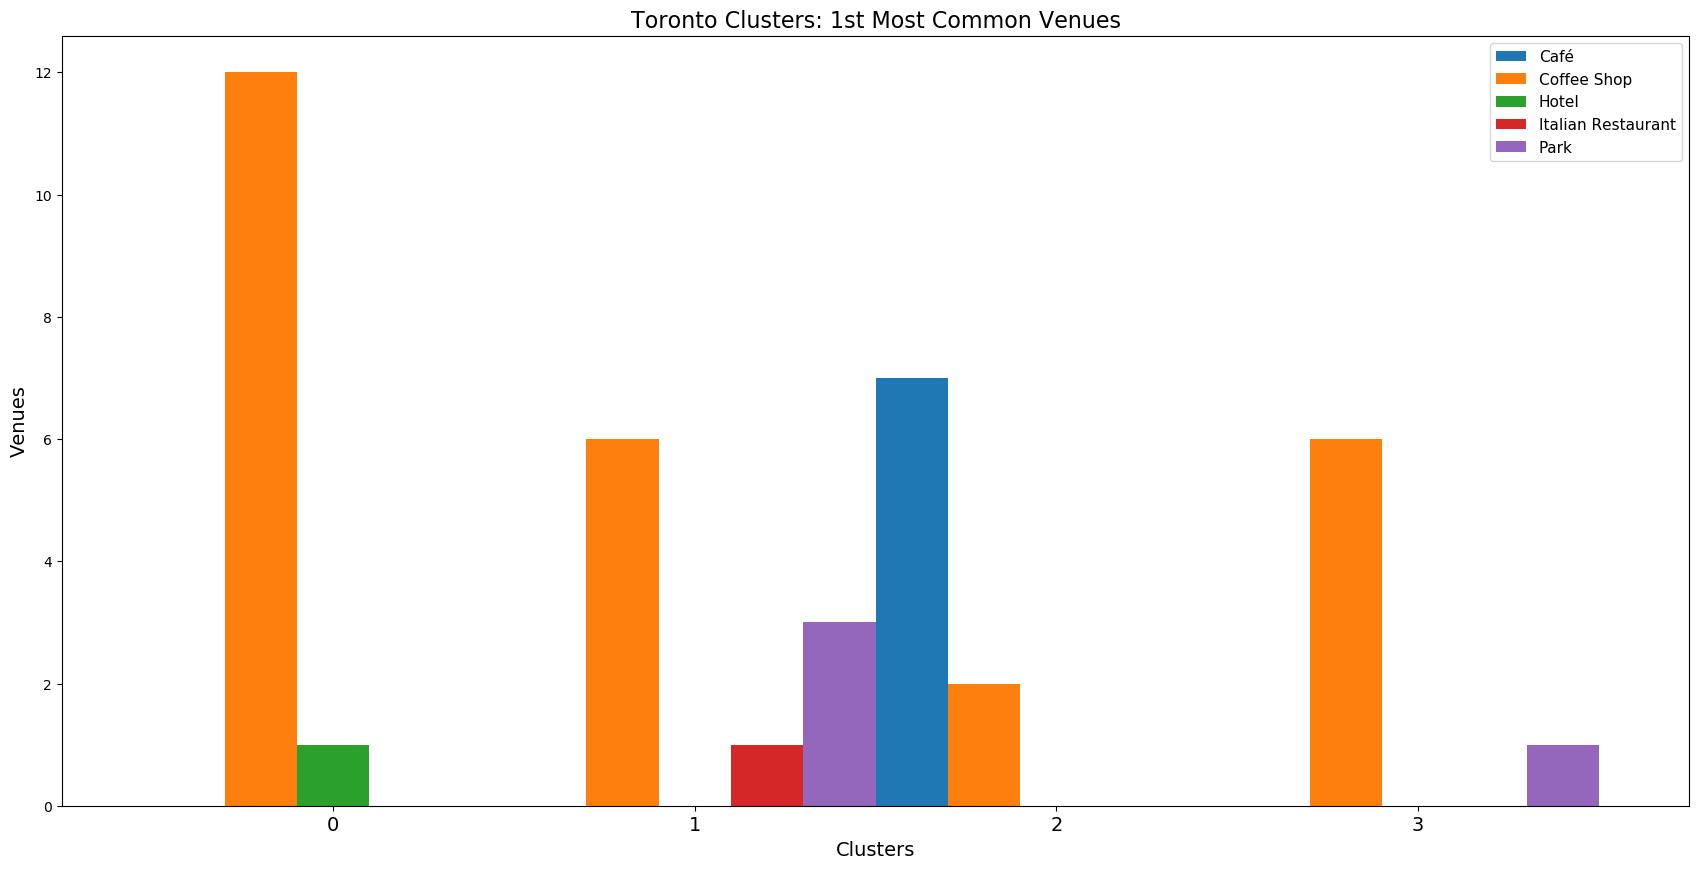

In [327]:
frame=toronto_cluster_1.plot(kind='bar',figsize=(21,10),width = 1.0)

plt.legend(labels=toronto_cluster_1.columns,fontsize= 11)
plt.title("Toronto Clusters: 1st Most Common Venues",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Venues', fontsize=14)

In [328]:
toronto_venues2 = toronto_merged
toronto_venues2 = toronto_venues2.drop(['Borough', 'Latitude', 'Longitude'], axis=1)
toronto_venues2 = toronto_venues2.groupby(['Cluster Labels','2nd Most Common Venue']).size().reset_index(name='Counts')
toronto_cluster_2 = toronto_venues2.pivot(index='Cluster Labels', columns='2nd Most Common Venue', values='Counts')
toronto_cluster_2 = toronto_cluster_2.fillna(0).astype(int).reset_index(drop=True)
toronto_cluster_2

2nd Most Common Venue,Bakery,Bar,Brewery,Café,Coffee Shop,Greek Restaurant,Hotel,Italian Restaurant,Japanese Restaurant,Park,Pub,Restaurant,Sushi Restaurant
0,0,0,0,7,1,0,2,0,2,1,0,0,0
1,1,0,0,1,2,0,0,5,0,0,0,0,1
2,0,3,0,1,1,1,0,1,1,0,0,1,0
3,0,0,1,3,0,0,0,0,0,2,1,0,0


*The Esplanade Bar Chart 2nd most common venues Cluster 1 (Cluster 0):*

Text(0, 0.5, 'Venues')

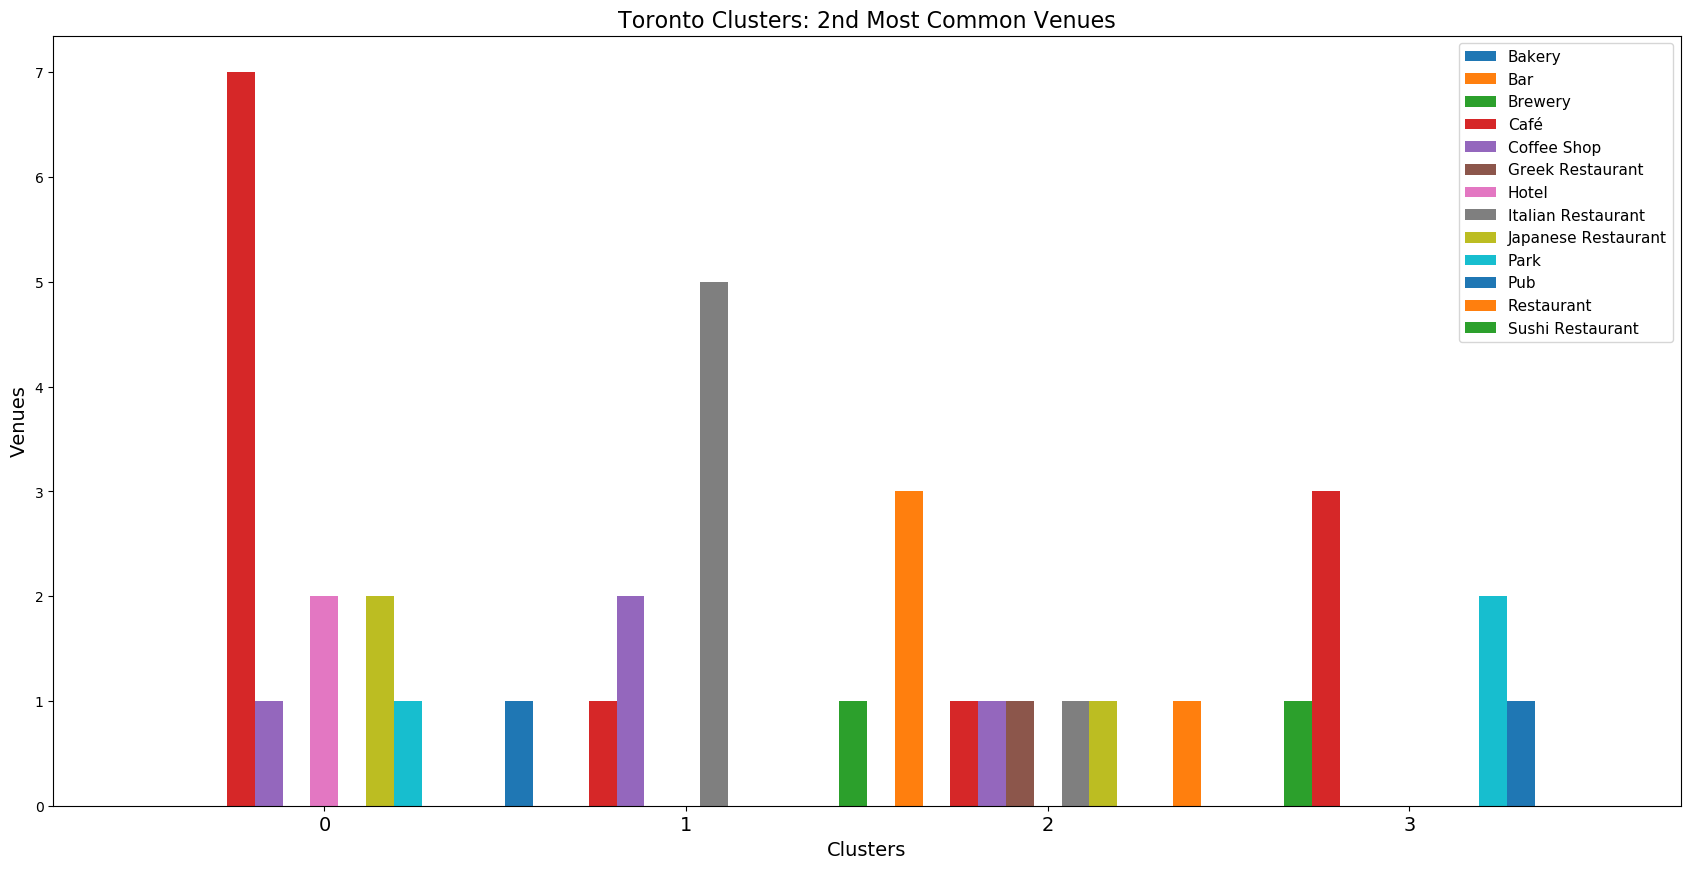

In [329]:
frame=toronto_cluster_2.plot(kind='bar',figsize=(21,10),width = 1.0)

plt.legend(labels=toronto_cluster_2.columns,fontsize= 11)
plt.title("Toronto Clusters: 2nd Most Common Venues",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Venues', fontsize=14)

*From the information gathered about The Esplanade neighborhood and surrounding neighborhoods in Cluster 1 (Cluster 0) we will list the 1st and 2nd most common venues:*

**Cluster 1 (Cluster 0):** 

**1st Most Common Venues: "Coffee Shop, Hotel"** 

**2nd Most Common Venues: "Cafe, Hotel, Coffee Shop, Japanese Restaurant, Park"**

*We will compare the list to the potential neighborhoods in Manhattan to find the neighborhood most similar to the client's current neighborhood.*

In [330]:
The_Esplanade = {'Esplanade 1st & 2nd Most Common Venues': [1,2], 'Venues': ["Coffee Shop, Hotel","Cafe, Hotel, Coffee Shop, Jap. Rest., Park"]}
The_Esplanade = pd.DataFrame(data=The_Esplanade)
The_Esplanade

,Esplanade 1st & 2nd Most Common Venues,Venues
0,1,"Coffee Shop, Hotel"
1,2,"Cafe, Hotel, Coffee Shop, Jap. Rest., Park"


<h2> Methodology & Analysis

Utilizing the data gathered from the Foursquare API, this project aims to assist a Real Estate agent in determining a neighborhood in Manhattan most similar to the client's current neighborhood in Toronto. By leveraging venue data from Foursquare’s Places API and k-means clustering unsupervised machine learning algorithm, we can better understand the diversity of each neighborhood and easily find the most similiar Manhattan neighborhood. 

First, we collected from the New York City Dataset, a list of Boroughs and Neighborhoods in New York City. We then created a dataframe listing all the neighborhoods within Manhattan and their corresponding latitudes and longitudes, excluding all other boroughs, which we could use to analyze using the Foursquare API. 

Second, we performed the same procedure to compose a dataframe that listed the neighborhoods in Toronto that only contained the word Toronto and their corresponding latitudes and longitudes. We did this by first creating a dataframe from the Toronto Dataset and joining it with the Toronto Longitude and Latitude Coordinates Dataset, excluding the neighborhoods that did not contain the word Toronto. 

Third, using the Foursquare API, we extracted information on the venues in Manhattan. We then created Manhattan neighborhood profiles by using the frequency the venues are visted and k-means clustering machine learning algorithm to compare and contrast the profiles created of each neighborhood. 

Fourth, using the Foursquare API, we extracted information on the venues in Toronto. We then created Toronto neighborhood profiles by using the frequency the venues are visted and k-means clustering machine learning algorithm to compare and contrast the profiles created of each neighborhood. Focusing on the client's current neighborhood, The Esplanade, we were able to create a neighborhood profile that included the 1st and 2nd most common venues. 

Next, we will analyze the Manhattan neighborhood profiles we created based on the most frequented venues in each neighborhood. We will compare the Manhattan neighborhood profiles of each of the four clusters with the Toronto The Esplanade neighborhood profile. We will then identify which Manhattan neighborhood most closely matches the characteristics of The Esplanade neighborhood and propose to the client three current houses within the optimal neighborhood using the Zillow API. 

Lastly, we will discuss and reasons why the optimal Manhattan neighborhood and three homes to propose to the client were selected.

**The Neighborhood Profile of the Client's Current Neighborhood in Toronto: The Esplanade**

In [331]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
11,Downtown Toronto,0,Coffee Shop,Café,Park,Gastropub,Thai Restaurant,Diner,Restaurant,Japanese Restaurant,Pub,Dance Studio,Ramen Restaurant,Ice Cream Shop,Breakfast Spot,Pool,Gay Bar
12,Downtown Toronto,0,Coffee Shop,Park,Café,Japanese Restaurant,Italian Restaurant,Gym,Men's Store,Gastropub,Gay Bar,Diner,Gourmet Shop,Comic Shop,Thai Restaurant,Pizza Place,Ramen Restaurant
14,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Café,Gastropub,Gym,Seafood Restaurant,Restaurant,Cosmetics Shop,Ramen Restaurant,Pizza Place,Plaza,Burrito Place,Steakhouse,Hotel,Tea Room
15,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Seafood Restaurant,Gastropub,Italian Restaurant,Steakhouse,Beer Bar,Clothing Store,Breakfast Spot,Bakery,Gym,Pizza Place,Cosmetics Shop
16,Downtown Toronto,0,Coffee Shop,Café,Park,Restaurant,Japanese Restaurant,Hotel,Beer Bar,Gastropub,Italian Restaurant,Liquor Store,Bakery,Farmers Market,Gym,New American Restaurant,American Restaurant
17,Downtown Toronto,0,Coffee Shop,Café,Ramen Restaurant,Pizza Place,Japanese Restaurant,Restaurant,Gastropub,Sushi Restaurant,Bookstore,Yoga Studio,Breakfast Spot,Park,Steakhouse,Mexican Restaurant,Dance Studio
18,Downtown Toronto,0,Coffee Shop,Hotel,Café,Pizza Place,Theater,Gastropub,Beer Bar,Japanese Restaurant,Gym,Plaza,Breakfast Spot,Seafood Restaurant,Italian Restaurant,Steakhouse,Movie Theater
19,Downtown Toronto,0,Coffee Shop,Café,Hotel,Park,Japanese Restaurant,Steakhouse,Italian Restaurant,Gym,Aquarium,Bar,Theater,Salad Place,Baseball Stadium,Deli / Bodega,Restaurant
20,Downtown Toronto,0,Coffee Shop,Hotel,Café,Italian Restaurant,Theater,Steakhouse,Concert Hall,Farmers Market,Salad Place,Lounge,Japanese Restaurant,Plaza,Thai Restaurant,Monument / Landmark,Gastropub
21,Downtown Toronto,0,Coffee Shop,Café,Hotel,Japanese Restaurant,Gastropub,Italian Restaurant,Beer Bar,Steakhouse,Theater,Farmers Market,Seafood Restaurant,Concert Hall,Vegetarian / Vegan Restaurant,Lounge,Plaza


In [332]:
The_Esplanade = {'Esplanade 1st & 2nd Most Common Venues': [1,2], 'Venues': ["Coffee Shop, Hotel","Cafe, Hotel, Coffee Shop, Jap. Rest., Park"]}
The_Esplanade = pd.DataFrame(data=The_Esplanade)
The_Esplanade

,Esplanade 1st & 2nd Most Common Venues,Venues
0,1,"Coffee Shop, Hotel"
1,2,"Cafe, Hotel, Coffee Shop, Jap. Rest., Park"


**Manhattan Neighborhood Clusters:**

In [333]:
Manhattan_List_1 = {'Cluster, Manhattan': [0,1,2,3], '1st Most Common Venues': ["Coffee Shop, Kor. Rest., South. Rest., Mex. Rest., Pizza Place","Ital. Rest., Wine Bar, Jap. Rest., Juice Bar, Coffee Shop, Park","Theater, Juice Bar, Park, South. Rest., Ital. Rest., Wine Bar", "Kor. Rest., Park, Gym"]}
Manhattan_List_1 = pd.DataFrame(data=Manhattan_List_1)
Manhattan_List_1

,"Cluster, Manhattan",1st Most Common Venues
0,0,"Coffee Shop, Kor. Rest., South. Rest., Mex. Re..."
1,1,"Ital. Rest., Wine Bar, Jap. Rest., Juice Bar, ..."
2,2,"Theater, Juice Bar, Park, South. Rest., Ital. ..."
3,3,"Kor. Rest., Park, Gym"


In [334]:
Manhattan_List_2 = {'Cluster, Manhattan': [0,1,2,3], '2nd Most Common Venues': ["Bar, Coffee Shop, Sushi Rest., Park, Latin Rest., Gourmet Shop","Yoga Studio, New Amer. Rest., Park, Ital. Rest., Wine Shop","Spa, Yoga Studio, Pizza Place, Park, Plaza, Sandwich Place, Wine Shop", "Yoga Studio, Park, Plaza, Sandwich Place, Spa"]}
Manhattan_List_2 = pd.DataFrame(data=Manhattan_List_2)
Manhattan_List_2

,"Cluster, Manhattan",2nd Most Common Venues
0,0,"Bar, Coffee Shop, Sushi Rest., Park, Latin Res..."
1,1,"Yoga Studio, New Amer. Rest., Park, Ital. Rest..."
2,2,"Spa, Yoga Studio, Pizza Place, Park, Plaza, Sa..."
3,3,"Yoga Studio, Park, Plaza, Sandwich Place, Spa"


*Comparing the Manhattan Neighborhood Clusters to the Esplanade Profile*

In [335]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
10,Lenox Hill,Italian Restaurant,Gym / Fitness Center,Art Museum,Bakery,Gym,Sushi Restaurant,Cycle Studio,Hotel,Women's Store,Ice Cream Shop,French Restaurant,Park,Grocery Store,Dessert Shop,Playground
11,Roosevelt Island,Park,Gym,Sushi Restaurant,Pizza Place,Ice Cream Shop,Gym / Fitness Center,Deli / Bodega,Greek Restaurant,Cocktail Bar,Italian Restaurant,Playground,Café,Liquor Store,Beer Garden,Thai Restaurant
13,Lincoln Square,Theater,Bakery,Performing Arts Venue,Italian Restaurant,Gym / Fitness Center,Jazz Club,Concert Hall,Mediterranean Restaurant,French Restaurant,Sushi Restaurant,Spa,Indie Movie Theater,Gym,Park,Plaza
16,Murray Hill,Korean Restaurant,Japanese Restaurant,Coffee Shop,Hotel,Gym / Fitness Center,Pizza Place,Chinese Restaurant,Sandwich Place,Mediterranean Restaurant,Cycle Studio,American Restaurant,New American Restaurant,Cosmetics Shop,Salad Place,Cuban Restaurant
17,Chelsea,Art Gallery,Yoga Studio,Gym / Fitness Center,Park,Seafood Restaurant,Bakery,Coffee Shop,Sushi Restaurant,Japanese Restaurant,New American Restaurant,Cycle Studio,Tapas Restaurant,Gym,Hotel,Scenic Lookout
21,Tribeca,Italian Restaurant,Park,Sushi Restaurant,Women's Store,Cycle Studio,Gym,Café,Salon / Barbershop,French Restaurant,Coffee Shop,Bakery,Spa,Men's Store,Pizza Place,Dance Studio
27,Gramercy,Gym / Fitness Center,Gourmet Shop,New American Restaurant,Pizza Place,Cycle Studio,Mediterranean Restaurant,Juice Bar,Gym,Japanese Restaurant,American Restaurant,Wine Shop,Cheese Shop,Spa,Coffee Shop,Bookstore
28,Battery Park City,Park,Coffee Shop,Gym / Fitness Center,Wine Shop,Hotel,Memorial Site,Falafel Restaurant,Gym,Plaza,Monument / Landmark,Cocktail Bar,Pizza Place,Bookstore,Scenic Lookout,Dog Run
29,Financial District,Coffee Shop,Park,Gym / Fitness Center,Pizza Place,Memorial Site,American Restaurant,Cocktail Bar,Plaza,Gym,Café,Shopping Mall,Scenic Lookout,Salad Place,French Restaurant,Falafel Restaurant
32,Civic Center,Park,Hotel,Women's Store,Spa,Wine Bar,Memorial Site,Bakery,Plaza,Salon / Barbershop,Cocktail Bar,Coffee Shop,Cycle Studio,Dance Studio,Men's Store,Falafel Restaurant


*It appears the Flatiron District neighborhood would be most similar to the Esplanade and closest to the client's future work at the Google office in Chelsea.*

In [336]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Flatiron, New York, New York")

In [337]:
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Flatiron Building, 175, 5th Avenue, Flatiron District, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States of America
Latitude = 40.741059199999995, Longitude = -73.98964162240998


In [338]:
map_manhattan4 = folium.Map(location=[location.latitude, location.longitude], zoom_start=15)
folium.CircleMarker(location=[location.latitude, location.longitude], radius=200, popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3, weight=0).add_to(map_manhattan4)
map_manhattan4

**Using the Zillow API, we will determine three current listings for a co-op/condo in the Flatiron District to propose to the client**

In [339]:
URL="https://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz17feojrjh8r_2jayc&state=ny&city=newyork&childtype=neighborhood"
source = requests.get(URL).text
soup = BeautifulSoup(source, 'lxml')
data = soup.encode("utf-8-sig")
print(data)

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?><html><body><regionchildren:regionchildren xmlns:regionchildren="http://www.zillow.com/static/xsd/RegionChildren.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemalocation="http://www.zillow.com/static/xsd/RegionChildren.xsd https://www.zillowstatic.com/vstatic/80d5e73/static/xsd/RegionChildren.xsd"><request><state>ny</state><city>newyork</city><childtype>neighborhood</childtype></request><message><text>Request successfully processed</text><code>0</code></message><response><region><id>6181</id><latitude>40.697488</latitude><longitude>-73.979681</longitude></region><subregiontype>neighborhood</subregiontype><list><count>274</count><region><id>270958</id><name>Upper West Side</name><zindex currency="USD">1307100</zindex><url>http://www.zillow.com/local-info/NY-New-York/Upper-West-Side/r_270958/</url><latitude>40.78686</latitude><longitude>-73.977296</longitude></region><region><id>270957</id><name>Upper East Side</nam

**Listing 1**

In [340]:
URL="http://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17feojrjh8r_2jayc&address=16-W-16th-St-APT-7AS&citystatezip=NewYork%2C+NY"
source = requests.get(URL).text
soup = BeautifulSoup(source, 'lxml')
data = soup.encode("utf-8-sig")
print(data)

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?><html><body><searchresults:searchresults xmlns:searchresults="http://www.zillow.com/static/xsd/SearchResults.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemalocation="http://www.zillow.com/static/xsd/SearchResults.xsd http://www.zillowstatic.com/vstatic/80d5e73/static/xsd/SearchResults.xsd"><request><address>16-W-16th-St-APT-7AS</address><citystatezip>NewYork, NY</citystatezip></request><message><text>Request successfully processed</text><code>0</code></message><response><results><result><zpid>97883030</zpid><links><homedetails>http://www.zillow.com/homedetails/16-W-16th-St-APT-7AS-New-York-NY-10011/97883030_zpid/</homedetails><graphsanddata>http://www.zillow.com/homedetails/16-W-16th-St-APT-7AS-New-York-NY-10011/97883030_zpid/#charts-and-data</graphsanddata><mapthishome>http://www.zillow.com/homes/97883030_zpid/</mapthishome><comparables>http://www.zillow.com/homes/comps/97883030_zpid/</comparables></links><addre

Listing 1: 16 West 16th Street, APT 7AS, New York, NY, 10011. Type: Cooperative. 1 Bedroom & 1 Bath. 750 sq. ft. Price: $965,000.

**Listing 2**

In [341]:
URL="http://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17feojrjh8r_2jayc&address=61-Irving-Pl-APT-1D&citystatezip=NewYork%2C+NY"
source = requests.get(URL).text
soup = BeautifulSoup(source, 'lxml')
data = soup.encode("utf-8-sig")
print(data)

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?><html><body><searchresults:searchresults xmlns:searchresults="http://www.zillow.com/static/xsd/SearchResults.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemalocation="http://www.zillow.com/static/xsd/SearchResults.xsd http://www.zillowstatic.com/vstatic/80d5e73/static/xsd/SearchResults.xsd"><request><address>61-Irving-Pl-APT-1D</address><citystatezip>NewYork, NY</citystatezip></request><message><text>Request successfully processed</text><code>0</code></message><response><results><result><zpid>244735195</zpid><links><homedetails>http://www.zillow.com/homedetails/61-Irving-Pl-APT-1D-New-York-NY-10003/244735195_zpid/</homedetails><graphsanddata>http://www.zillow.com/homedetails/61-Irving-Pl-APT-1D-New-York-NY-10003/244735195_zpid/#charts-and-data</graphsanddata><mapthishome>http://www.zillow.com/homes/244735195_zpid/</mapthishome><comparables>http://www.zillow.com/homes/comps/244735195_zpid/</comparables></links><add

Listing 2: 61 Irving Place, APT 1D, New York, NY, 10003. Type: Cooperative. 1 Bedroom & 1 Bath. 950 sq. ft. Price: $999,000. 

**Listing 3**

In [342]:
URL="http://www.zillow.com/webservice/GetSearchResults.htm?zws-id=X1-ZWz17feojrjh8r_2jayc&address=21-E-22nd-St-APT-2A&citystatezip=NewYork%2C+NY"
source = requests.get(URL).text
soup = BeautifulSoup(source, 'lxml')
data = soup.encode("utf-8-sig")
print(data)

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?><html><body><searchresults:searchresults xmlns:searchresults="http://www.zillow.com/static/xsd/SearchResults.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemalocation="http://www.zillow.com/static/xsd/SearchResults.xsd http://www.zillowstatic.com/vstatic/80d5e73/static/xsd/SearchResults.xsd"><request><address>21-E-22nd-St-APT-2A</address><citystatezip>NewYork, NY</citystatezip></request><message><text>Request successfully processed</text><code>0</code></message><response><results><result><zpid>2081965513</zpid><links><homedetails>http://www.zillow.com/homedetails/21-E-22nd-St-APT-2A-New-York-NY-10010/2081965513_zpid/</homedetails><mapthishome>http://www.zillow.com/homes/2081965513_zpid/</mapthishome><comparables>http://www.zillow.com/homes/comps/2081965513_zpid/</comparables></links><address><street>21 E 22nd St APT 2A</street><zipcode>10010</zipcode><city>New York</city><state>NY</state><latitude>40.740398</latitu

Listing 3: 21 E 22nd Street, APT 2A, New York, NY, 10010. Type: Cooperative. 0 Bedroom & 1 Bath. 925 sq. ft. Price: $925,000. 

<h2> Results and Discussion

As our analysis has shown that the Esplanade neighborhood profile when compared to Manhattan neighborhood profiles we created, most closely matches the Flatiron District neighborhood. The neighborhood profiles were created based on K-Means Clustering, a form of unsupervised machine learning, along with venue frequency data gathered by using the Foursquare API. The Flatiron District neighborhood appeared to be most comparable to the Esplanade neighborhood in terms of venue frequency and would also be a short commute to client's future employment at the Google office in Chelsea. Based on the results, the Chelsea neighborhood appeared to be a close tie for second. Based on this information we gathered using the Zillow API 3 listings, most similar to the client's current home at 1 A The Esplanade Ave # 2008, Toronto, ON, M5E 0A8. While the client's current home is a 2 bedroom & 2 bathroom condo, listed for C$899,000, almost all 2 bedroom & 2 bathroom condos listed in the Flatiron District were priced significantly higher. The three listings proposed were based first on price and then on sq. ft. and number of bedrooms and bathrooms. Of the three listings, Listing 1 appeared to be the best fit for the client. 


The resulting Manhattan neighborhoods listed in cluster 1 (cluster 0) contained the largest number of potential optimal neighborhoods based on the number and frequency of venues. I belive the information gathered, joined with other demographics and statistics not explored in this project, would determine which of the potential neighborhoods would be the very best match. The purpose of this analysis, to create neighborhood profiles based on data gathered via the Foursquare API, was to demonstrate and provide information on areas in Manhattan that might closely match the client's current neighborhood in Toronto. The recommended neighborhood should be considered as a starting point for a more detailed analysis which may result in a location where many other factors have been taken into account.

<h2> Conclusion

As our analysis has shown that the Esplanade neighborhood profile when compared to Manhattan neighborhood profiles we created, most closely matches the Flatiron District neighborhood. The neighborhood profiles were created based on K-Means Clustering, a form of unsupervised machine learning, along with venue frequency data gathered by using the Foursquare API. While each neighborhood profile was based on the venue frequency from Foursquare, there are many other demographics and statistics that could be applied in creating neighborhood profiles. 

The primary stakeholders, interested in a new way to use quantifiable analysis to understand and profile a neighborhood would be Real Estate Agents and Real Estate Buyers. Previously neighborhood profiles have always been aggregated and compared based on historic, statistical, and/or demographic information. However, I believe a new approach based on venues and often they’re visited for creating neighborhood profiles in order to compare other neighborhood profiles can provide a basis for a much more accurate area profile.

**The area in Manhattan determined to be most similar to the client's current neighborhood in Toronto, the Esplanade, is the Flatiron District.** 

**As a Real Estate Agent in New York City, the three listings I would propose that are most similar to client's current home are:**

Listing 1: 16 West 16th Street, APT 7AS, New York, NY, 10011. Type: Cooperative. 1 Bedroom & 1 Bath. 750 sq. ft. Price: $965,000.

Listing 2: 61 Irving Place, APT 1D, New York, NY, 10003. Type: Cooperative. 1 Bedroom & 1 Bath. 950 sq. ft. Price: $999,000. 

Listing 3: 21 E 22nd Street, APT 2A, New York, NY, 10010. Type: Cooperative. 0 Bedroom & 1 Bath. 925 sq. ft. Price: $925,000. 

<h3> End

This notebook was created by Dan Poliseno on 2/6/2020.